In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import canon.features.refactored_parameterized_spectra as bandparams

# Example Usage

Three examples shown:
- Example 1: standard bands
- Example 2: custom bands
- Example 3: automated band definition by specificifying the number of peaks to find

Using bands: [(0.3, 1.5), (1.5, 4), (4, 8), (8, 12.5), (12.5, 30), (30, 70), (70, 150), (150, 250)] to fit
Fit aperiodic component with knee mode
Peak parameters: [[-0.61176383  0.71212225  1.36693071]
 [ 0.65056576  1.03931717  0.83303945]
 [ 1.78638357  0.48801771  0.47304968]
 [ 2.44221885  0.29212527  0.16356003]
 [ 3.07226791  0.18388429  0.506089  ]
 [ 3.86695906  0.05942599  0.26571721]
 [ 4.66256087 -0.05109929  0.51243796]
 [ 5.01063529 -0.11315881  0.30228691]]
Peak 0: CF: 0.5423933378144468, PW: 0.7121222527261182, BW: 3.9232904618278006
Peak 1: CF: 1.9166248726766832, PW: 1.0393171723324617, BW: 2.3002997779973913
Peak 2: CF: 5.96783115021979, PW: 0.4880177063286908, BW: 1.6048811188544434
Peak 3: CF: 11.49852599161892, PW: 0.29212526998898625, BW: 1.1776960538385708
Peak 4: CF: 21.590813243530214, PW: 0.183884287405645, BW: 1.6587909602363522
Peak 5: CF: 47.796817704675505, PW: 0.059425992003882655, BW: 1.304366149345305
Peak 6: CF: 105.90694922055071, PW: -0.0510992899692

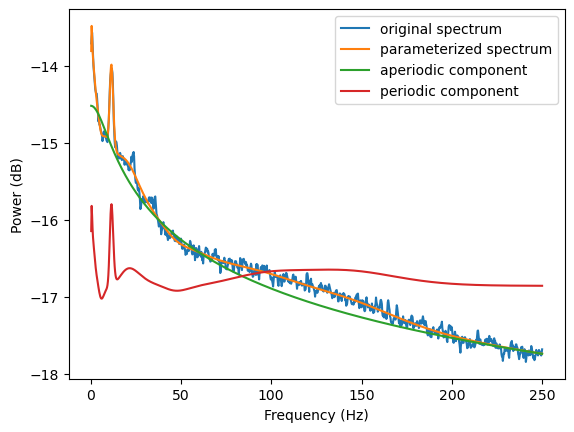

In [23]:
# current path
filepath = os.path.dirname(os.path.abspath(__file__))
filepath = 
power_spectrum = np.load(os.path.join(filepath, 'example_spectrum.npy')) # some power spectrum in linear space
freqs = np.load(os.path.join(filepath, 'example_freqs.npy')) # corresponding frequencies
# standard bands defined as [(0.3, 1.5), (1.5, 4), (4, 8), (8, 12.5), (12.5, 30), (30, 70), (70, 150), (150, 250)]
param_spectra = bandparams.ParamSpectra(bands='standard',  log_freqs=True, n_division=1, l_freq=0.3, h_freq=250, prominence=0.5, linenoise=60, aperiodic_mode='knee', verbose=1)
param_spectra.fit(freqs, power_spectrum)
print(param_spectra.get_params_out())
plt.figure()
plt.plot(freqs, np.log10(power_spectrum), label='original spectrum')
plt.plot(freqs, param_spectra.modeled_spectrum_, label='parameterized spectrum')
plt.plot(freqs, param_spectra._ap_fit, label='aperiodic component')
plt.plot(freqs, param_spectra._peak_fit+np.mean(param_spectra._ap_fit), label='periodic component')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.show()


Using bands: [(0.3, 1.5), (1.5, 4), (4, 8), (8, 12.5), (12.5, 25), (25, 36), (36, 45), (45, 70), (70, 150), (150, 250)] to fit
Fit aperiodic component with knee mode
Peak parameters: [[-0.6112546   0.71181163  1.36693071]
 [ 0.65224265  1.03951046  0.83303967]
 [ 1.78887194  0.4878773   0.48177004]
 [ 2.44413165  0.29255363  0.16952397]
 [ 3.07620925  0.18409071  0.30998536]
 [ 3.53682362  0.0976063   0.11230921]
 [ 3.71923188  0.05870138  0.18952068]
 [ 3.9605114   0.02092537  0.04701856]
 [ 4.66068796 -0.05137295  0.49947896]
 [ 5.01063529 -0.11238984  0.30368057]]
Peak 0: CF: 0.5426696103206687, PW: 0.7118116281510201, BW: 3.9232904618771065
Peak 1: CF: 1.9198415306077956, PW: 1.0395104576746448, BW: 2.300300270817178
Peak 2: CF: 5.9826998330555465, PW: 0.48787730497833515, BW: 1.6189374492176622
Peak 3: CF: 11.520541391510793, PW: 0.29255363244788946, BW: 1.1847407459438337
Peak 4: CF: 21.676077809298263, PW: 0.18409071128223076, BW: 1.363405151742932
Peak 5: CF: 34.357612779585054

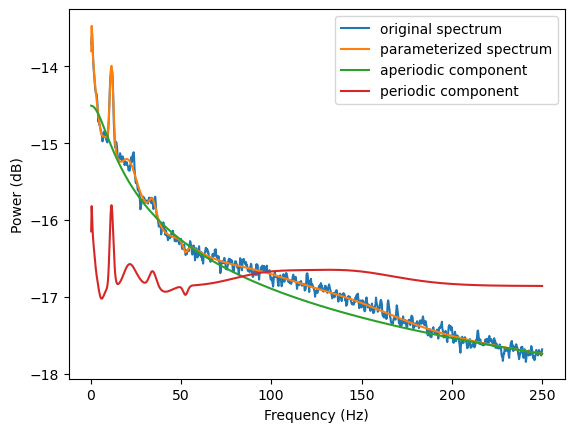

In [27]:
power_spectrum = np.load(os.path.join(filepath, 'example_spectrum.npy')) # some power spectrum in linear space
freqs = np.load(os.path.join(filepath, 'example_freqs.npy')) # corresponding frequencies
custom_bands = [(0.3, 1.5), (1.5, 4), (4, 8), (8, 12.5), (12.5, 25), (25, 36), (36, 45), (45, 70), (70, 150), (150, 250)]
param_spectra = bandparams.ParamSpectra(bands=custom_bands, log_freqs=True, n_division=1, l_freq=0.3, h_freq=250, prominence=0.5, linenoise=60, aperiodic_mode='knee', verbose=1)
param_spectra.fit(freqs, power_spectrum)
print(param_spectra.get_params_out())
plt.figure()
plt.plot(freqs, np.log10(power_spectrum), label='original spectrum')
plt.plot(freqs, param_spectra.modeled_spectrum_, label='parameterized spectrum')
plt.plot(freqs, param_spectra._ap_fit, label='aperiodic component')
plt.plot(freqs, param_spectra._peak_fit+np.mean(param_spectra._ap_fit), label='periodic component')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.show()


Using bands: [(0.3, 0.8885808887835519), (0.8885808887835519, 2.6319199863712237), (2.6319199863712237, 7.795579335656451), (7.795579335656451, 23.090009382201014), (23.090009382201014, 68.39113686285573), (68.39113686285573, 202.5701905950464), (202.5701905950464, 599.9999999999998)] to fit
Fit aperiodic component with knee mode
Peak parameters: [[-0.84461429  0.75761845  0.92223031]
 [ 0.25196999  0.75761845  0.92223031]
 [ 1.81437528  0.52137796  0.43026693]
 [ 2.44379279  0.22318614  0.16708185]
 [ 3.13940003  0.11533511  0.45383735]
 [ 4.80470501 -0.07711581  0.64660087]
 [ 5.38483323 -0.1287152   0.32273706]]
Peak 0: CF: 0.4297230744490202, PW: 0.7576184526403864, BW: 2.5148931276655415
Peak 1: CF: 1.2865574313796662, PW: 0.7576184526403864, BW: 2.5148931276655415
Peak 2: CF: 6.137240906162459, PW: 0.5213779619158991, BW: 1.5376679131316768
Peak 3: CF: 11.516638174527047, PW: 0.2231861438304712, BW: 1.1818509998001607
Peak 4: CF: 23.09000938220103, PW: 0.11533510650464152, BW: 1.

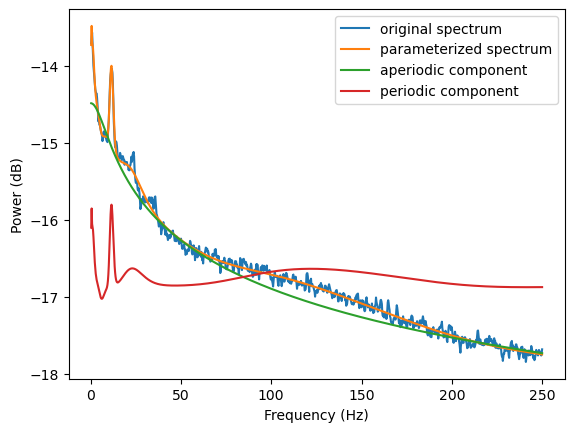

In [31]:
power_spectrum = np.load(os.path.join(filepath, 'example_spectrum.npy')) # some power spectrum in linear space
freqs = np.load(os.path.join(filepath, 'example_freqs.npy')) # corresponding frequencies
bands = 'log'
max_n_peaks = 7 # how peaks to find 
n_division = 1 # how many peaks per band
param_spectra = bandparams.ParamSpectra(bands=bands,  max_n_peaks=max_n_peaks, log_freqs=n_division, n_division=1, l_freq=0.3, h_freq=600, prominence=0.5, linenoise=60, aperiodic_mode='knee', verbose=1)
param_spectra.fit(freqs, power_spectrum)
print(param_spectra.get_params_out())
plt.figure()
plt.plot(freqs, np.log10(power_spectrum), label='original spectrum')
plt.plot(freqs, param_spectra.modeled_spectrum_, label='parameterized spectrum')
plt.plot(freqs, param_spectra._ap_fit, label='aperiodic component')
plt.plot(freqs, param_spectra._peak_fit+np.mean(param_spectra._ap_fit), label='periodic component')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.show()
